# DarkELF phonon notebook

This notebook is meant to illustrate the main features of the darkELF package for calculating DM phonon scattering rates.

written by Tongyan Lin & Simon Knapen, 04/20/2021

In [1]:
%matplotlib inline

import sys, os
import numpy as np
from numpy import pi
import matplotlib.pyplot as plt
import matplotlib.ticker
from matplotlib import rc, rcParams
import matplotlib.cm as cm
from mpl_toolkits.axes_grid1 import make_axes_locatable
import time
import pandas
from scipy import interpolate

# uses matplotlib-label-lines, see for example https://github.com/cphyc/matplotlib-label-lines
#from labellines import labelLine, labelLines

# Make use of TeX\ufeff
rc('text',usetex=True)
# Change all fonts to 'Computer Modern'
rc('font',**{'size':14, 'family':'serif','serif':['Times New Roman']})
rc('xtick.major', size=5, pad=7)
rc('xtick', labelsize=15)
rc('ytick.major', size=5, pad=7)
rc('ytick', labelsize=15)

# this needs to point to the folder where darkelf.py is stored
work_dir = os.getcwd()
sys.path.append(work_dir+"/..")
plotdir=work_dir+"/plots/"

# load the package
from darkelf import darkelf, targets

## Load the materials

When loading the materials, the "phonon_filename" flag must be set, to specify which data file for the ELF in the phonon regime is being used. For some anisotropic materials we include both the ordinary and the extraordinary response. For those cases the user can overwrite the default .yaml configuration file with the "targetyaml" flag. In the example below, "Al2O3.yaml" corresponds to the ordinary response and will be loaded by default. There is no default for "phonon_filename" flag. In the Al2O3 example below, "Al2O3_mermin.dat" is available for the electronic response ("filename" flag) while "Al2O3_epsphonon_e.dat" and "Al2O3_epsphonon_o.dat" are respectively the extraordinary and the ordinary phonon response, which need to be specified with the "phonon_filename" flag.

In [2]:
targets.files('Al2O3')

Available configuration files: 
	 Al2O3.yaml
	 Al2O3_extraordinary.yaml
 
Available data for epsilon: 
	 Al2O3_epsphonon_e.dat
	 Al2O3_mermin.dat
	 Al2O3_epsphonon_o.dat
 
Available data for phonon density of states: 
 
Available data for phonon partial density of states: 
 
Available data for Fn(omega) functions: 
 
Available data for form factors: 


If one is only interested in the phonon response, the electronic response specified with the "filename" flag is not used. If it is not specified, the code will produce a warning message, as seen below. This can be ignored as long as we only care about DM-phonon scattering. Let's load a few materials, for sapphire and SiO2 we will compare the ordinary and extraordinary response. For Si and Ge we compare the theoretical and measured responses.

In [3]:
targets.files('Si')

Available configuration files: 
	 Si.yaml
 
Available data for epsilon: 
	 Si_Migdal_FAC.dat
	 Si_atomic_Zion.dat
	 Si_mermin.dat
	 Si_gpaw_noLFE.dat
	 Si_gpaw_withLFE.dat
	 Si_epsphonon_theory6K.dat
	 Si_epsphonon_data6K.dat
	 Si_Zion.dat
 
Available data for phonon density of states: 
	 Si_DoS.dat
 
Available data for phonon partial density of states: 
 
Available data for Fn(omega) functions: 
	 Si_Fn.dat
 
Available data for form factors: 


In [4]:
saph = darkelf(target='Al2O3',phonon_filename="Al2O3_epsphonon_o.dat") # ordinary response
saph_e = darkelf(target='Al2O3',targetyaml='Al2O3_extraordinary',phonon_filename="Al2O3_epsphonon_e.dat") # extraordinary response

gaas = darkelf(target='GaAs',phonon_filename="GaAs_epsphonon_data10K.dat")

sic = darkelf(target='SiC',phonon_filename="SiC_epsphonon_3C.dat")

sio2 = darkelf(target='SiO2',filename='SiO2_mermin.dat',phonon_filename="SiO2_epsphonon_o.dat")
sio2e = darkelf(target='SiO2',filename='SiO2_mermin.dat',phonon_filename="SiO2_epsphonon_e.dat")

zns = darkelf(target='ZnS',filename='ZnS_mermin.dat',phonon_filename="ZnS_epsphonon_300K.dat")

gan = darkelf(target='GaN',filename='GaN_mermin.dat',phonon_filename="GaN_epsphonon_300K.dat")

si = darkelf(mX=1e5,target='Si',filename='Si_gpaw_withLFE.dat',phonon_filename="Si_epsphonon_data6K.dat")
si_th = darkelf(mX=1e5,target='Si',filename='Si_gpaw_withLFE.dat',phonon_filename="Si_epsphonon_theory6K.dat")

ge = darkelf(mX=1e5,target='Ge',phonon_filename="Ge_epsphonon_data2K.dat")
ge_th = darkelf(mX=1e5,target='Ge',phonon_filename="Ge_epsphonon_theory6K.dat")

 .... Loading files for Al2O3
Loaded Al2O3_mermin.dat for epsilon in electron regime
electronic ELF taken or calculated from Y. Sun, H. Xu, B. Da, S.-f. Mao and Z.-j. Ding, Calculations of Energy-Loss Function for 26 Materials, Chinese Journal of Chemical Physics9(2016) 663.
phonon ELF taken or calculated from  F. Gervais and B. Piriou, Anharmonicity in several-polar-mode crystals:  adjusting phonon self-energy of LO and TO modes in Al2O3 and TiO2 to fit infrared reflectivity,Journal of Physics C Solid State Physics 7 (1974) 2374 and M. Schubert, T.E. Tiwald and C.M. Herzinger, Infrared dielectric anisotropy and phonon modes of sapphire, Phys. Rev. B61(2000) 8187
Loaded Al2O3_epsphonon_o.dat for epsilon in phonon regime
Warning! Atomic Migdal calculation not present
Warning! Momentum Zion not loaded. Using Z - number of valence electrons.
Warning! Dark photon fd not loaded. Need to set fd_filename for both atoms
Warning! Density of states not loaded. Need to set dos_filename for both a

 .... Loading files for Si
Loaded Si_gpaw_withLFE.dat for epsilon in electron regime
electronic ELF taken or calculated from J. Enkovaara et al.,Electronic structure calculations with GPAW: a real-space implementation of the projector augmented-wave method,Journal of Physics:Condensed Matter22(2010) 253202.
phonon ELF taken or calculated from M. Ikezawa and M. Ishigame, Far-Infrared AbsorptionDue to the Two-Phonon Difference Process in Si, Journal of the Physical Society of Japan 50(1981) 3734.
Loaded Si_epsphonon_data6K.dat for epsilon in phonon regime
Zion(k) for Migdal calculation taken or calculated from: P. J. Brown, A. G. Fox, E. N. Maslen, M. A. OKeefe,and B. T. M. Willis, “Intensity of diffracted intensities,” in International Tables for Crystallography (American Cancer Society, 2006) Chap. 6.1, pp. 554–595, https://onlinelibrary.wiley.com/doi/pdf/10.1107/97809553602060000
Loaded Si_atomic_Zion.dat for dark photon couplings
Loaded Si_DoS.dat for density of states
Loaded Fn(omeg

## Computing the rate

In [5]:
?saph.dRdomega_phonon

In [6]:
omega = np.logspace(np.log10(0.04),np.log10(0.2),300)
domega = np.log(omega[1]/omega[0])
rt = saph.dRdomega_phonon(omega)
rte = saph_e.dRdomega_phonon(omega)

Sapphire differential rate, with ordinary and extraordinary response

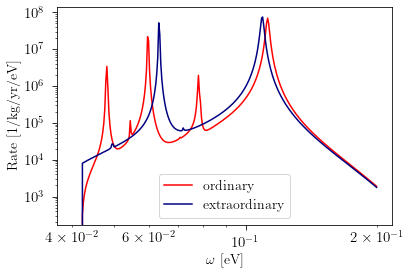

In [7]:
plt.plot(omega,rt,color='r',label="ordinary")
plt.plot(omega,rte,color='Navy',label="extraordinary")
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$\omega$ [eV]')
plt.ylabel(r'Rate [1/kg/yr/eV]')
plt.legend()

plt.savefig(plotdir+"darkelf_phonon_1.pdf",bbox_inches='tight')

## Simple routine to compute cross section plots 

Frolich flag refers to an analtyical approximation, see Section V of the paper, as well as 1712.06598 and 1807.10291

In [8]:
?saph.R_phonon

In [9]:
mXvec = np.logspace(3,6,30)

def getlim(target,Frohlich=True):
    mXvec = np.logspace(3,6,30)
    siglim_num = np.zeros_like(mXvec)
    siglim = np.zeros_like(mXvec)
    for i in range(len(mXvec)):
        target.update_params(mX = mXvec[i], mMed = 1e-3) # update the DM mass
        rt = target.R_phonon(sigmae=1e-38) # use measured ELF
        siglim_num[i] = 3./(rt) * 1e-38
        if(Frohlich): 
            rt = target.R_phonon_Frohlich(sigmae=1e-38) # use analytic Frolich approximation
            siglim[i] = 3./(rt) * 1e-38
    return siglim, siglim_num

## Plot reach curves and compare various materials

In [10]:
saph_siglim_o, saph_siglim_o_num = getlim(saph)
saph_siglim_e, saph_siglim_e_num = getlim(saph_e)

/var/folders/rg/bnkv6w611wd9wt6wb3m9n5mm0000gn/T/ipykernel_88173/587438057.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  siglim_num[i] = 3./(rt) * 1e-38
/var/folders/rg/bnkv6w611wd9wt6wb3m9n5mm0000gn/T/ipykernel_88173/587438057.py:13: RuntimeWarning: divide by zero encountered in double_scalars
  siglim[i] = 3./(rt) * 1e-38


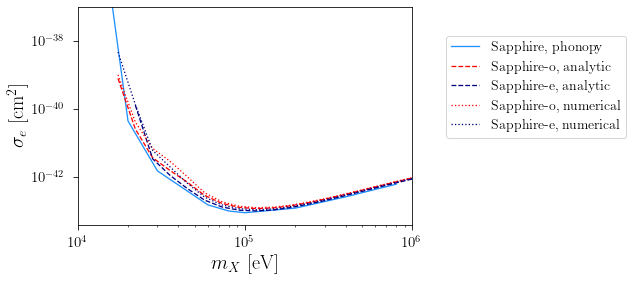

In [11]:
Sapphire_ph = np.loadtxt('data/Al2O3_sigmalimit_phonopy_sph_nophase.txt') # obtained with DFT + phonopy calculation, see 1807.10291

plt.plot(Sapphire_ph[0],Sapphire_ph[1],color='DodgerBlue',label='Sapphire, phonopy',linewidth=1.3)

plt.plot(mXvec,saph_siglim_o,color='r',linestyle='--',label='Sapphire-o, analytic',linewidth=1.3)
plt.plot(mXvec,saph_siglim_e,color='Navy',linestyle='--',label='Sapphire-e, analytic',linewidth=1.3)

plt.plot(mXvec,saph_siglim_o_num,color='r',linestyle=':',label='Sapphire-o, numerical',linewidth=1.3)
plt.plot(mXvec,saph_siglim_e_num,color='Navy',linestyle=':',label='Sapphire-e, numerical',linewidth=1.3)


plt.xscale('log')
plt.yscale('log')

plt.xlim([1e4,1e6])
plt.ylim([4e-44,1e-37])
plt.xlabel('$m_X$ [eV]',fontsize=20)
plt.ylabel('$\sigma_e$ [cm$^2$]',fontsize=20)
plt.legend(loc=(1.1,0.4),fontsize=14)

plt.savefig(plotdir+"darkelf_phonon_2.pdf",bbox_inches='tight')

We see that the difference between the ordinary and extraordinary response for sapphire is relatively minor. The analytic form and measured ELF also produce very similar limit curves.

Compare Al2O3, GaAs and SiC

In [12]:
gaas_siglim, gaas_siglim_num = getlim(gaas)
sic_siglim, sic_siglim_num = getlim(sic)

/var/folders/rg/bnkv6w611wd9wt6wb3m9n5mm0000gn/T/ipykernel_88173/587438057.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  siglim_num[i] = 3./(rt) * 1e-38
/var/folders/rg/bnkv6w611wd9wt6wb3m9n5mm0000gn/T/ipykernel_88173/587438057.py:13: RuntimeWarning: divide by zero encountered in double_scalars
  siglim[i] = 3./(rt) * 1e-38


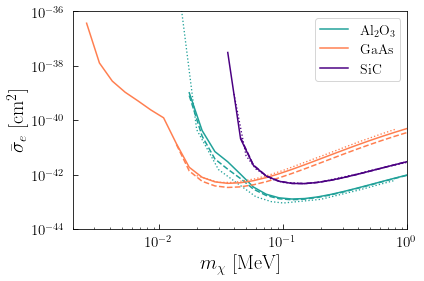

In [13]:
rcParams['figure.figsize'] = 6,4

# Al2O3
saphcolor='#20A199'
plt.plot(mXvec/1e6,saph_siglim_o_num,color=saphcolor,label=r'Al$_2$O$_3$')
plt.plot(mXvec/1e6,saph_siglim_o,color=saphcolor,linestyle='--')
Sapphire_ph = np.loadtxt('data/Al2O3_sigmalimit_phonopy_sph_nophase.txt')
plt.plot(Sapphire_ph[0]/1e6,Sapphire_ph[1],color=saphcolor,linestyle=':',linewidth=1.3)

# GaAs
gaascolor = 'Coral'
plt.plot(mXvec/1e6,gaas_siglim_num,color=gaascolor,label='GaAs')
plt.plot(mXvec/1e6,gaas_siglim,color=gaascolor,linestyle='--')
ph = np.loadtxt('data/GaAs_sigmalimit_phonopy_sph_nophase.txt')
plt.plot(ph[0]/1e6,ph[1],color=gaascolor,linestyle=':',linewidth=1.3)

# SiC
plt.plot(mXvec/1e6,sic_siglim_num,color='Indigo',label='SiC')
plt.plot(mXvec/1e6,sic_siglim,color='Indigo',linestyle='--')
ph = np.loadtxt('data/SiC-3C-sigmalimit_phonopy_Frohlich.txt')
plt.plot(ph[0]/1e6,ph[1],color='Indigo',linestyle=':',linewidth=1.3)

# Freeze-in
dat = np.loadtxt('data/freezein_sige_all.txt').T

######### constraints

datadir = 'data/'
alphaEM = 1./137
meMeV = 0.511
eVcm = saph.eVcm

# stellar constraints
newWD = np.loadtxt(datadir+"redondo_WD.txt").T
mXfoo = pow(10,newWD[0])/1e6
epsfoo = pow(10,newWD[1])
sig_WD = 16*pi*alphaEM*alphaEM*(epsfoo)**2*(mXfoo*meMeV)**2/(mXfoo + meMeV)**2 * \
        1.0/(alphaEM*meMeV)**4 * 1e-12 * eVcm**2

newWD = np.loadtxt(datadir+"redondo_HB.txt").T
mXfoo = pow(10,newWD[0])/1e6
epsfoo = pow(10,newWD[1])
sig_WD = 16*pi*alphaEM*alphaEM*(epsfoo)**2*(mXfoo*meMeV)**2/(mXfoo + meMeV)**2 * \
        1.0/(alphaEM*meMeV)**4 * 1e-12 * eVcm**2

newWD = np.loadtxt(datadir+"redondo_RG.txt").T
mXfoo = pow(10,newWD[0])/1e6
epsfoo = pow(10,newWD[1])
sig_WD = 16*pi*alphaEM*alphaEM*(epsfoo)**2*(mXfoo*meMeV)**2/(mXfoo + meMeV)**2 * \
        1.0/(alphaEM*meMeV)**4 * 1e-12 * eVcm**2

# plot BBN/SN bounds
mXfoo = np.logspace(-3,np.log10(5.0))
sig_SN = 16*pi*alphaEM*alphaEM*(1e-9)**2*(mXfoo*meMeV)**2/(mXfoo + meMeV)**2 * \
        1.0/(alphaEM*meMeV)**4 * 1e-12 * eVcm**2

plt.legend()

plt.tick_params(direction="in",which='both')
plt.xscale('log')
plt.yscale('log')
plt.xlim([2e-3,1])
plt.ylim([1e-44,1e-36])
plt.xlabel('$m_\chi$ [MeV]',fontsize=20)
plt.ylabel(r'$\bar \sigma_e$ [cm$^2$]',fontsize=20)

plt.savefig(plotdir+"darkelf_phonon_3.pdf",bbox_inches='tight')

More materials

In [14]:
sio2_siglim, sio2_siglim_num = getlim(sio2)
sio2e_siglim, sio2e_siglim_num = getlim(sio2e)
zns_siglim, zns_siglim_num = getlim(zns)
gan_siglim, gan_siglim_num = getlim(gan)

foo, siglim_Si = getlim(si, Frohlich=False)
foo, siglim_Ge = getlim(ge, Frohlich=False)
foo, siglim_Si_th = getlim(si_th, Frohlich=False)
foo, siglim_Ge_th = getlim(ge_th, Frohlich=False)

/var/folders/rg/bnkv6w611wd9wt6wb3m9n5mm0000gn/T/ipykernel_88173/587438057.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  siglim_num[i] = 3./(rt) * 1e-38
/var/folders/rg/bnkv6w611wd9wt6wb3m9n5mm0000gn/T/ipykernel_88173/587438057.py:13: RuntimeWarning: divide by zero encountered in double_scalars
  siglim[i] = 3./(rt) * 1e-38


/Users/ethanvillarama/Library/Python/3.8/lib/python/site-packages/labellines/core.py:148: UserWarning: Tried to label line Line2D(_child16), but could not find a label for it.
  warnings.warn(


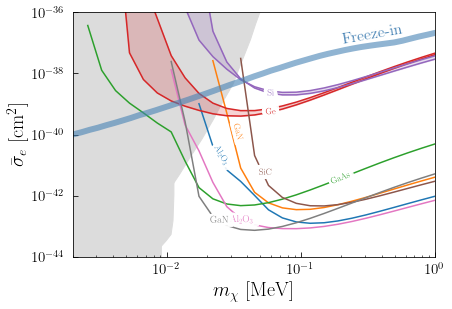

In [15]:
rcParams['figure.figsize'] = 6.5,4.5

cmap = plt.get_cmap('tab10')
colors = cmap(np.linspace(0.0,1.0,10))
#cmap = plt.get_cmap('Set1')
#colors = cmap(np.linspace(0.0,1.0,8))

fig, ax = plt.subplots()

######### constraints

datadir = 'data/'
alphaEM = 1./137
meMeV = 0.511
eVcm = saph.eVcm

# stellar constraints
newWD = np.loadtxt(datadir+"redondo_WD.txt").T
mXfoo = pow(10,newWD[0])/1e6
epsfoo = pow(10,newWD[1])
sig_WD = 16*pi*alphaEM*alphaEM*(epsfoo)**2*(mXfoo*meMeV)**2/(mXfoo + meMeV)**2 * \
        1.0/(alphaEM*meMeV)**4 * 1e-12 * eVcm**2
ax.fill_between(mXfoo,sig_WD,mXfoo*0+1e-32,color='Gainsboro')

newWD = np.loadtxt(datadir+"redondo_HB.txt").T
mXfoo = pow(10,newWD[0])/1e6
epsfoo = pow(10,newWD[1])
sig_WD = 16*pi*alphaEM*alphaEM*(epsfoo)**2*(mXfoo*meMeV)**2/(mXfoo + meMeV)**2 * \
        1.0/(alphaEM*meMeV)**4 * 1e-12 * eVcm**2
ax.fill_between(mXfoo,sig_WD,mXfoo*0+1e-32,color='Gainsboro')

newWD = np.loadtxt(datadir+"redondo_RG.txt").T
mXfoo = pow(10,newWD[0])/1e6
epsfoo = pow(10,newWD[1])
sig_WD = 16*pi*alphaEM*alphaEM*(epsfoo)**2*(mXfoo*meMeV)**2/(mXfoo + meMeV)**2 * \
        1.0/(alphaEM*meMeV)**4 * 1e-12 * eVcm**2
ax.fill_between(mXfoo,sig_WD,mXfoo*0+1e-32,color='Gainsboro')

# plot BBN/SN bounds
mXfoo = np.logspace(-3,np.log10(5.0))
sig_SN = 16*pi*alphaEM*alphaEM*(1e-9)**2*(mXfoo*meMeV)**2/(mXfoo + meMeV)**2 * \
        1.0/(alphaEM*meMeV)**4 * 1e-12 * eVcm**2
#plt.plot(mXfoo,sig_SN,color='DarkGray')
ax.fill_between(mXfoo,sig_SN,mXfoo*0+1e-32,color='Gainsboro')

####### materials

# Al2O3
ax.plot(mXvec/1e6,saph_siglim_o_num,color=colors[0],label=r'Al$_2$O$_3$')

# GaN
ax.plot(mXvec/1e6,gan_siglim_num,color=colors[1],label='GaN')

# GaAs
ax.plot(mXvec/1e6,gaas_siglim_num,color=colors[2],label='GaAs')

# Ge
siglim_Ge_th[0:9] = 1e-35
ax.plot(mXvec/1e6,siglim_Ge,color=colors[3],label='Ge')
ax.plot(mXvec/1e6,siglim_Ge_th,color=colors[3])
ax.fill_between(mXvec/1e6,siglim_Ge,siglim_Ge_th,color=colors[3],alpha=0.2)

# Si
siglim_Si[0:12] = 1e-35
ax.plot(mXvec/1e6,siglim_Si,color=colors[4],label='Si')
ax.plot(mXvec/1e6,siglim_Si_th,color=colors[4])
ax.fill_between(mXvec/1e6,siglim_Si,siglim_Si_th,color=colors[4],alpha=0.2)

# SiC
ax.plot(mXvec/1e6,sic_siglim_num,color=colors[5],label='SiC')

# SiO2
ax.plot(mXvec/1e6,sio2_siglim_num,color=colors[6],label=r'SiO$_2$')

# ZnS
ax.plot(mXvec/1e6,zns_siglim_num,color=colors[7],label=r'ZnS')


# Freeze-in
dat = np.loadtxt('data/freezein_sige_all.txt').T
ax.plot(dat[0],dat[1],color='SteelBlue',alpha=0.6,linewidth=6.0)
ax.text(0.2,9e-38,'Freeze-in',color="SteelBlue",rotation=10,fontsize=16)

# Nicer labels than using legend
props = dict(facecolor='white', alpha=0.9, edgecolor='white',boxstyle="square,pad=0.15")
lines = ax.get_lines()
labelLines(lines[0:3],xvals=[0.026,0.034,.2],fontsize=9,zorder=2.5,
           ha='center',va='center',align=True,bbox=props)
labelLine(lines[3],0.06,fontsize=9,zorder=2.5,
           ha='center',va='center',align=False,bbox=props)
labelLine(lines[5],0.06,fontsize=9,zorder=2.5,
           ha='center',va='center',align=False,bbox=props)
labelLine(lines[7],0.055,fontsize=9,zorder=2.5,
           ha='center',va='center',align=False,bbox=props)
labelLines(lines[8:],xvals=[0.037,.025],fontsize=10,zorder=2.5,
           ha='center',va='center',align=False,bbox=props)


ax.set_xscale('log')
ax.set_yscale('log')
ax.tick_params(direction='in',which='both')
ax.set_xlim([2e-3,1])
ax.set_ylim([1e-44,1e-36])
ax.set_xlabel('$m_\chi$ [MeV]',fontsize=20)
ax.set_ylabel(r'$\bar \sigma_e$ [cm$^2$]',fontsize=20)

plt.savefig(plotdir+"darkelf_phonon_4.pdf",bbox_inches='tight')